<h1 style='text-align:center;font-weight:bold;color:white'> Husband Wage Analysis</h1>

## **Attribute Infromation**

| Attribute | Description                                                     |
|-----------|-----------------------------------------------------------------|
| hw        | Weekly Husband Wage (USD) in 2006                               |
| he        | Husband Years of Education                                      |
| ha        | Husband Age                                                     |
| cit       | Dummy variable for a husband living in a major city (value = 1) |

# **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as rmse

In [2]:
wage = pd.read_stata('hwage.dta')
wage

,hw,he,ha,cit
0,15.230000,12.0,34.0,0.0
1,31.910000,9.0,30.0,1.0
2,13.540000,12.0,40.0,0.0
3,13.390000,10.0,53.0,0.0
4,37.799999,12.0,32.0,1.0
...,...,...,...,...
748,35.049999,16.0,43.0,1.0
749,18.389999,12.0,33.0,0.0
750,4.120000,12.0,43.0,0.0
751,47.020000,8.0,55.0,1.0


In [3]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hw      753 non-null    float32
 1   he      753 non-null    float32
 2   ha      753 non-null    float32
 3   cit     753 non-null    float32
dtypes: float32(4)
memory usage: 11.9 KB


In [4]:
wage.describe()

,hw,he,ha,cit
count,753.000000,753.000000,753.000000,753.000000
mean,28.282614,12.491368,45.120850,0.642762
std,15.991426,3.020804,8.058793,0.479504
min,1.560000,3.000000,30.000000,0.000000
25%,18.100000,11.000000,38.000000,0.000000
50%,26.370001,12.000000,46.000000,1.000000
75%,34.650002,15.000000,52.000000,1.000000
max,153.119995,17.000000,60.000000,1.000000


## Weekly Husband Wage against Husband Years of Education

In [8]:
pd.DataFrame(wage.groupby('he')['hw'].agg('mean'))

,hw
he,
3.0,11.070000
4.0,11.616666
5.0,21.289999
6.0,22.582857
7.0,19.661764
8.0,22.096500
9.0,20.562918
10.0,22.635294
11.0,23.732973


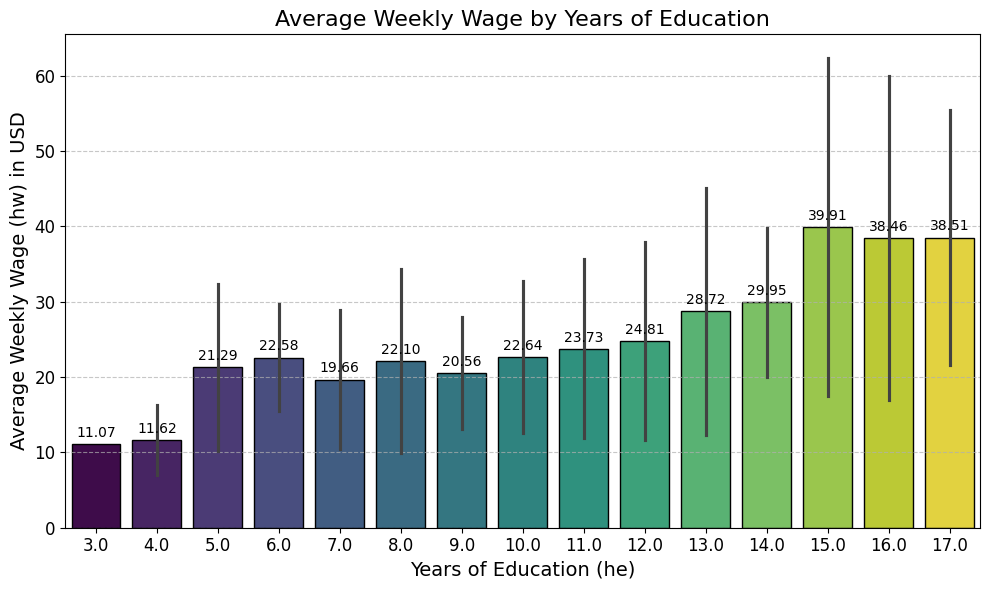

In [9]:
plt.figure(figsize=(10, 6))  

sns.barplot(
    data=wage,
    x='he',
    y='hw',
    hue='he',
    estimator='mean',
    errorbar='sd',  
    palette='viridis',
    legend=False,  
    edgecolor='black' 
)

plt.title('Average Weekly Wage by Years of Education', fontsize=16)
plt.xlabel('Years of Education (he)', fontsize=14)
plt.ylabel('Average Weekly Wage (hw) in USD', fontsize=14)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 

plt.show()

> **Insight:**

- For lower levels of education (3-4 years) the average weekly wage is relatively low ,ranging between 11-12 USD per week.
- As the years of education increase (5-14 years), the average weekly wage gradually rises, indicating that additional education is associated with increased earnings, ranging between 20-30 USD per week.
- At higher education levels (15-17 years), the average weekly wage shows a more substantial increase, reaching upwards of 38 to 40 USD per week. 
- The standard deviation is relatively consistent across different education levels, though it appears to increase slightly at 15-17 years of education.

This suggests that the return on education (in terms of weekly wages) becomes more pronounced at higher levels of education.

In [10]:
wage[['hw','he']].corr()

,hw,he
hw,1.000000,0.394662
he,0.394662,1.000000


In [11]:
Y = wage['hw']
x1 = sm.add_constant(wage[['he']])

display(Y,x1)

0      15.230000
1      31.910000
2      13.540000
3      13.390000
4      37.799999
         ...    
748    35.049999
749    18.389999
750     4.120000
751    47.020000
752    23.020000
Name: hw, Length: 753, dtype: float32

,const,he
0,1.0,12.0
1,1.0,9.0
2,1.0,12.0
3,1.0,10.0
4,1.0,12.0
...,...,...
748,1.0,16.0
749,1.0,12.0
750,1.0,12.0
751,1.0,8.0


In [12]:
sm_lm_1 = sm.OLS(Y,x1)
result_1 = sm_lm_1.fit()

In [13]:
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     hw   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.79e-29
Time:                        19:36:58   Log-Likelihood:                -3091.6
No. Observations:                 753   AIC:                             6187.
Df Residuals:                     751   BIC:                             6196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1850      2.281      0.958      0.3

## Interpretation

Y = 2.1080 + 2.0892x
<br>

Intercept (B0 = 2.1850):
<br>
The intercept represents the estimated weekly wage (in USD) of a husband with zero years of education. The p-value for this coefficient (0.338) is greater than 0.05, indicating that the intercept is not statistically significant. This means that there isn't strong evidence to conclude that the weekly wage is around $2.19 when education is zero. However, the concept of "zero years of education" may not be meaningful in most practical contexts, so the significance of the intercept may not be critical here.

Slope (B1 = 2.0892):
<br>
The coefficient for he (B1 = 2.0892) indicates that for each additional year of education completed by the husband, his weekly wage is expected to increase by approximately $2.09. This coefficient is statistically significant, as evidenced by its p-value of 0.000 (less than 0.05), suggesting a strong positive relationship between the years of education and weekly wage.

Statistical Tests:

F-Test:
<br>
The very low p-value for the F-statistic (1.79e-29) suggests that the overall regression model is statistically significant. This indicates that the independent variable (he) helps to explain the variation in the dependent variable (hw).
<br>

T-Tests (Partial Tests):
<br>
B0 (Intercept): The p-value is 0.338, which is not statistically significant at the 0.05 level. However, as mentioned earlier, the intercept's relevance may not be practically meaningful in this context.
B1 (Slope for he): The p-value is 0.000, indicating that he is a statistically significant predictor of hw.
<br>

R-squared:
<br>
The R-squared value is 0.156 (15.6%), meaning that only about 15.6% of the variation in the husband's weekly wage (hw) can be explained by the years of education (he). This relatively low value suggests that while education level is a significant predictor, there are many other factors not included in this model that likely affect weekly wages.

In [14]:
# create data frame for prediction
y_predict_1 = result_1.predict()
y_predict_1 = pd.DataFrame(data=y_predict_1,columns=['prediction_1'])
y_predict_1

,prediction_1
0,27.256026
1,20.988279
2,27.256026
3,23.077528
4,27.256026
...,...
748,35.613023
749,27.256026
750,27.256026
751,18.899030


In [15]:
# create column 'y_predict' in wage
wage['y_pred_1'] = y_predict_1
wage

,hw,he,ha,cit,y_pred_1
0,15.230000,12.0,34.0,0.0,27.256026
1,31.910000,9.0,30.0,1.0,20.988279
2,13.540000,12.0,40.0,0.0,27.256026
3,13.390000,10.0,53.0,0.0,23.077528
4,37.799999,12.0,32.0,1.0,27.256026
...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023
749,18.389999,12.0,33.0,0.0,27.256026
750,4.120000,12.0,43.0,0.0,27.256026
751,47.020000,8.0,55.0,1.0,18.899030


In [16]:
# create column 'residual' in wage
wage['residual_1'] = wage['hw'] - wage['y_pred_1']
wage

,hw,he,ha,cit,y_pred_1,residual_1
0,15.230000,12.0,34.0,0.0,27.256026,-12.026027
1,31.910000,9.0,30.0,1.0,20.988279,10.921721
2,13.540000,12.0,40.0,0.0,27.256026,-13.716026
3,13.390000,10.0,53.0,0.0,23.077528,-9.687528
4,37.799999,12.0,32.0,1.0,27.256026,10.543973
...,...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023,-0.563023
749,18.389999,12.0,33.0,0.0,27.256026,-8.866027
750,4.120000,12.0,43.0,0.0,27.256026,-23.136026
751,47.020000,8.0,55.0,1.0,18.899030,28.120970


In [17]:
# Checking RMSE
np.sqrt(sum(pow(wage['residual_1'],2))/len(wage))

np.float64(14.683581355894745)

In [18]:
rmse_1 = rmse(wage['hw'],wage['y_pred_1'])
rmse_1

np.float64(215.60756143517975)

In [19]:
resid_1 = wage.residual_1
y_p_1 = wage.y_pred_1

## Check Zero Mean Value of Residuals

In [20]:
resid_1.mean()

np.float64(4.1066161833040586e-14)

> **Insight:**

The mean of the residuals is very close to zero (4.1066161833040586e-14), which satisfies the assumption of the zero mean value for the residuals.

## Check Constant Variance

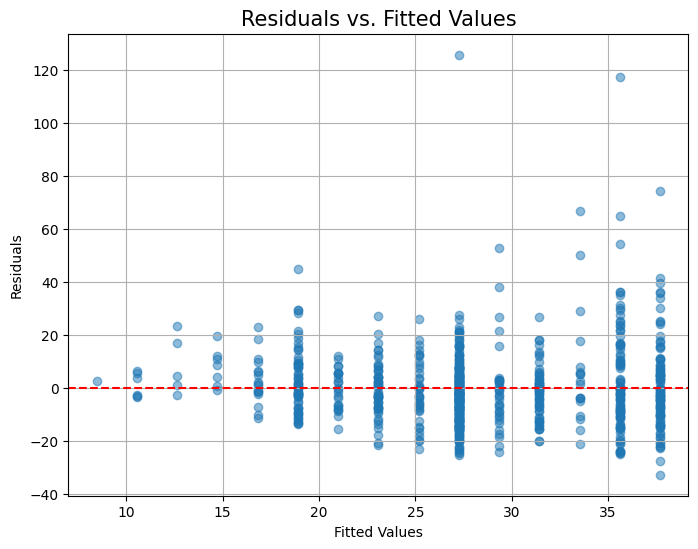

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_p_1, resid_1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values',fontsize=15)
plt.xlabel('Fitted Values', fontsize=10)
plt.ylabel('Residuals',fontsize=10)
plt.grid(True)
plt.show()

> **Insight:**

The residual plot indicates a potential violation of the constant variance assumption due to the increasing spread of residuals with higher fitted values. This suggests that the model may suffer from heteroscedasticity.

# Weekly Husband Wage against Husband Age

In [22]:
pd.DataFrame(wage.groupby('ha')['hw'].agg('mean')).sort_values(by='hw', ascending=False)

,hw
ha,
57.0,34.401001
36.0,33.043999
48.0,32.914474
45.0,32.756397
51.0,32.376896
49.0,32.242069
38.0,31.780001
55.0,31.080870
47.0,30.492926


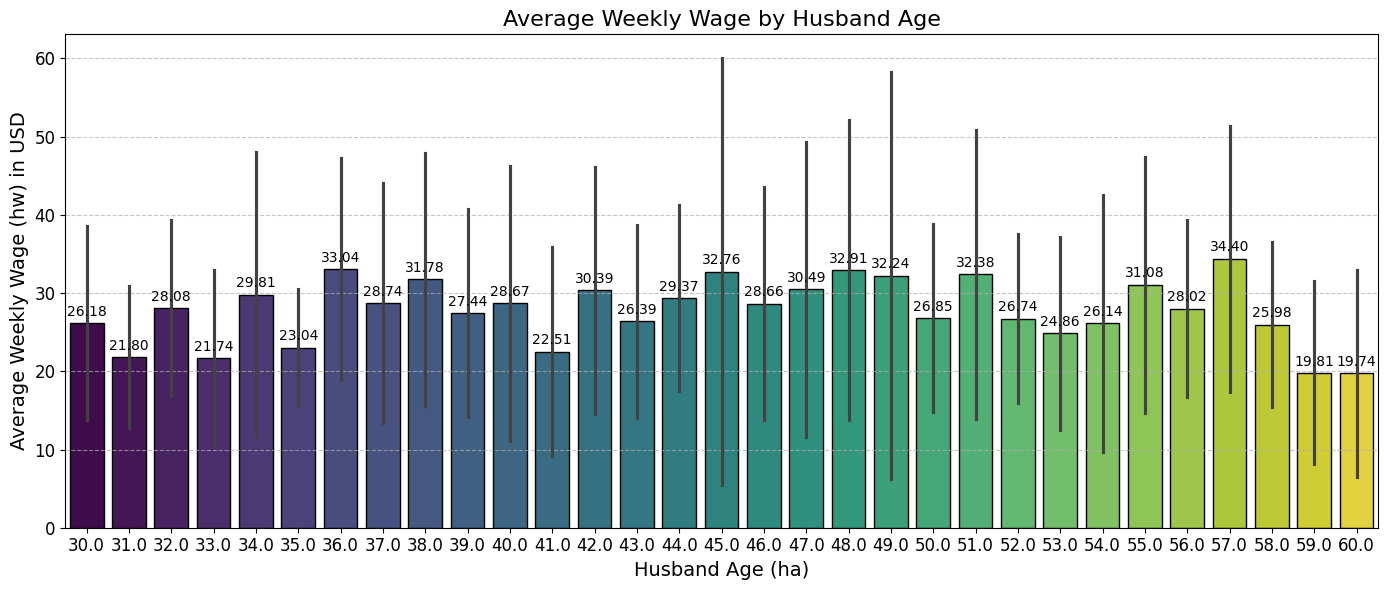

In [23]:
plt.figure(figsize=(14, 6))  

sns.barplot(
    data=wage,
    x='ha',
    y='hw',
    hue='ha',
    estimator='mean',
    errorbar='sd',  
    palette='viridis',
    legend=False,  
    edgecolor='black' 
)

plt.title('Average Weekly Wage by Husband Age', fontsize=16)
plt.xlabel('Husband Age (ha)', fontsize=14)
plt.ylabel('Average Weekly Wage (hw) in USD', fontsize=14)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 

plt.show()

> **Insight:**

- The age group 57 years old shows the highest average weekly wage approximately 34.40 USD. Other age groups, such as 36, 45, and 48 years old, also show relatively higher average weekly wages compared to other ages.
- Husbands around the ages of 31, 33, 41, 59, and 60 have low average weekly wages, generally below 23 USD. Particularly, ages 59 and 60 have the lowest average wages (around 19-20 USD).
- The error bars (representing the standard deviation) indicate significant variability in weekly wages within most age groups. Some age groups, such as 35 years old group, show relatively lower variability, suggesting more consistent wages among individuals of these group. But Other age groups, like 45 and 49, exhibit higher variability, could indicate the presence of outliers or diverse income levels.

The lack of a consistent increasing or decreasing trend suggests that age alone is not a sufficient predictor of weekly wages.

In [24]:
wage[['hw','ha']].corr()

,hw,ha
hw,1.000000,0.019694
ha,0.019694,1.000000


In [25]:
Y = wage['hw']
x2 = sm.add_constant(wage[['ha']])

display(Y,x2)

0      15.230000
1      31.910000
2      13.540000
3      13.390000
4      37.799999
         ...    
748    35.049999
749    18.389999
750     4.120000
751    47.020000
752    23.020000
Name: hw, Length: 753, dtype: float32

,const,ha
0,1.0,34.0
1,1.0,30.0
2,1.0,40.0
3,1.0,53.0
4,1.0,32.0
...,...,...
748,1.0,43.0
749,1.0,33.0
750,1.0,43.0
751,1.0,55.0


In [26]:
sm_lm_2 = sm.OLS(Y,x2)
result_2 = sm_lm_2.fit()

In [27]:
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     hw   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2914
Date:                Sat, 14 Sep 2024   Prob (F-statistic):              0.589
Time:                        19:36:59   Log-Likelihood:                -3155.2
No. Observations:                 753   AIC:                             6314.
Df Residuals:                     751   BIC:                             6324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5193      3.318      7.992      0.0

## Interpretation

Y = 26.5193 + 0.0391x
<br>

Intercept (B0 = 26.5193):
<br>
The intercept represents the estimated weekly wage (in USD) when the husband's age (ha) is at its base level, which in many cases is interpreted as zero or the reference group for categorical variables. Since age is unlikely to be zero, this intercept mainly serves as a baseline from which the effect of age increments is calculated. The intercept is statistically significant (p-value = 0.000), suggesting that this baseline wage is different from zero.

Slope (B1 = 0.0391):
<br>
The coefficient for ha (B1 = 0.0391) indicates that for each unit increase in the age group of the husband, the predicted weekly wage (hw) increases by approximately 0.0391 dollars (3.91 cents). However, this effect is not statistically significant (p-value = 0.589 > 0.05), implying that there is no strong evidence to suggest that the husband's age group significantly affects his weekly wage, based on this model.

Statistical Tests:

F-Test:
<br>
The p-value for the F-statistic is 0.589, which is significantly greater than 0.05. This indicates that the overall regression model is not statistically significant. In other words, the independent variable (ha or age group of the husband) does not significantly explain the variation in the dependent variable (hw or weekly wage).
<br>

T-Tests (Partial Tests):
<br>
B0 (Intercept): The p-value is 0.000, suggesting that the intercept is statistically significant.
B1 (Slope for he): The p-value is 0.589, indicating that age (ha) is not a statistically significant predictor of the weekly wage (hw).
<br>

R-squared:
<br>
The R-squared value is 0.000, meaning that 0% of the variation in the husband's weekly wage (hw) is explained by the age (ha). This suggests that age, as grouped in this context, does not contribute to explaining any variability in weekly wages.

In [28]:
y_predict_2 = result_2.predict()
y_predict_2 = pd.DataFrame(data=y_predict_2,columns=['prediction_2'])
y_predict_2

,prediction_2
0,27.848006
1,27.691683
2,28.082490
3,28.590539
4,27.769845
...,...
748,28.199732
749,27.808925
750,28.199732
751,28.668700


In [29]:
wage['y_pred_2'] = y_predict_2
wage

,hw,he,ha,cit,y_pred_1,residual_1,y_pred_2
0,15.230000,12.0,34.0,0.0,27.256026,-12.026027,27.848006
1,31.910000,9.0,30.0,1.0,20.988279,10.921721,27.691683
2,13.540000,12.0,40.0,0.0,27.256026,-13.716026,28.082490
3,13.390000,10.0,53.0,0.0,23.077528,-9.687528,28.590539
4,37.799999,12.0,32.0,1.0,27.256026,10.543973,27.769845
...,...,...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023,-0.563023,28.199732
749,18.389999,12.0,33.0,0.0,27.256026,-8.866027,27.808925
750,4.120000,12.0,43.0,0.0,27.256026,-23.136026,28.199732
751,47.020000,8.0,55.0,1.0,18.899030,28.120970,28.668700


In [30]:
wage['residual_2'] = wage['hw'] - wage['y_pred_2']
wage

,hw,he,ha,cit,y_pred_1,residual_1,y_pred_2,residual_2
0,15.230000,12.0,34.0,0.0,27.256026,-12.026027,27.848006,-12.618006
1,31.910000,9.0,30.0,1.0,20.988279,10.921721,27.691683,4.218317
2,13.540000,12.0,40.0,0.0,27.256026,-13.716026,28.082490,-14.542490
3,13.390000,10.0,53.0,0.0,23.077528,-9.687528,28.590539,-15.200538
4,37.799999,12.0,32.0,1.0,27.256026,10.543973,27.769845,10.030155
...,...,...,...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023,-0.563023,28.199732,6.850267
749,18.389999,12.0,33.0,0.0,27.256026,-8.866027,27.808925,-9.418926
750,4.120000,12.0,43.0,0.0,27.256026,-23.136026,28.199732,-24.079732
751,47.020000,8.0,55.0,1.0,18.899030,28.120970,28.668700,18.351300


In [31]:
np.sqrt(sum(pow(wage['residual_2'],2))/len(wage))

np.float64(15.977703432649585)

In [32]:
rmse_2 = rmse(wage['ha'],wage['y_pred_2'])
rmse_2

np.float64(343.4136967577101)

In [33]:
resid_2 = wage.residual_2
y_p_2 = wage.y_pred_2 

## Check Zero Mean Value of Residuals

In [34]:
resid_2.mean()

np.float64(1.3814536057805932e-14)

> **Insight:**

The mean of the residuals is very close to zero (1.3814536057805932e-14), which satisfies the assumption of the zero mean value for the residuals.

## Check Constant Variance

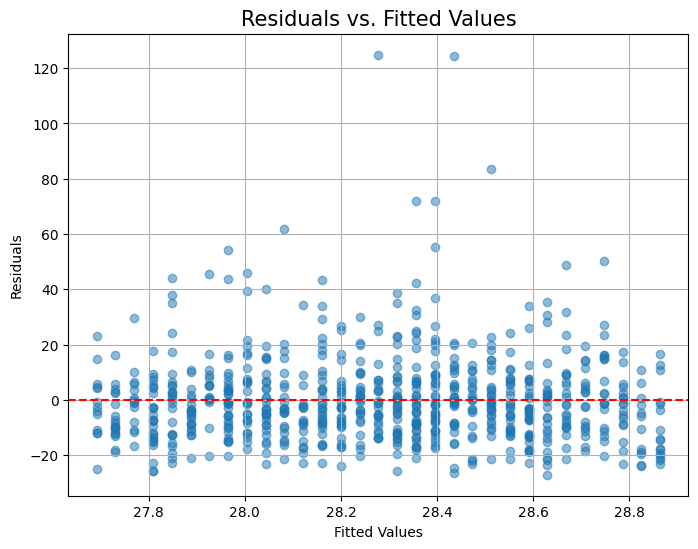

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_p_2, resid_2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values',fontsize=15)
plt.xlabel('Fitted Values', fontsize=10)
plt.ylabel('Residuals',fontsize=10)
plt.grid(True)
plt.show()

> **Insight:**

The presence of increasing variance as fitted values increase suggests possible heteroscedasticity (non-constant variance). The residuals tend to spread out more as the fitted values increase, which may violate the constant variance assumption.

## Weekly Husband Wage against Husband Residency

In [36]:
pd.DataFrame(wage.groupby('cit')['hw'].agg('mean'))

,hw
cit,
0.0,21.349331
1.0,32.136032


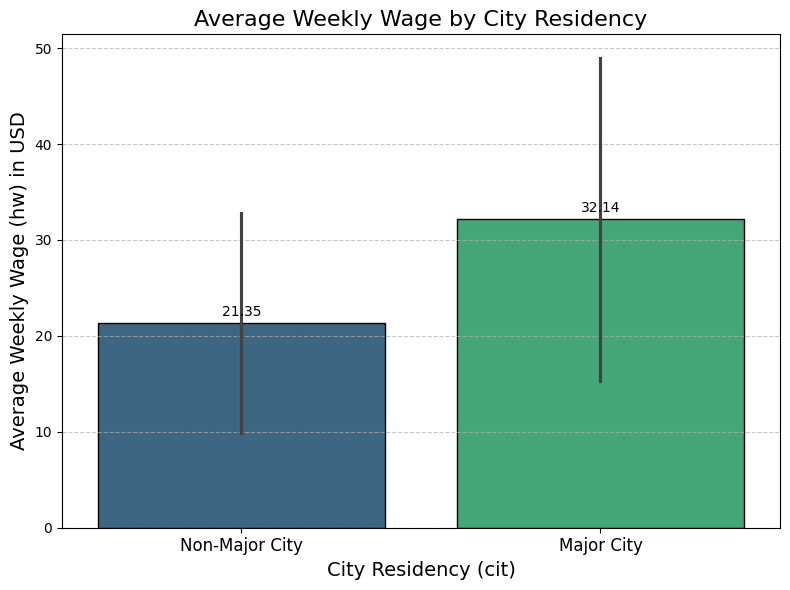

In [37]:
plt.figure(figsize=(8, 6))  

sns.barplot(
    data=wage,
    x='cit',
    y='hw',
    hue='cit',
    estimator='mean',
    errorbar='sd',  
    palette='viridis',
    legend=False,  
    edgecolor='black'  
)

plt.title('Average Weekly Wage by City Residency', fontsize=16)
plt.xlabel('City Residency (cit)', fontsize=14)
plt.ylabel('Average Weekly Wage (hw) in USD', fontsize=14)

plt.xticks([0, 1], ['Non-Major City', 'Major City'], fontsize=12)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', padding=3)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

> **Insight:**

- Husbands living in major cities have a higher average weekly wage (approximately 32.1 USD) compared to those living in non-major cities (approximately 21.3 USD).
- For both groups, the error bars are quite large (higher for husbands living in major cities), indicating that there is considerable variability in weekly wages within each group.

City residency has a significant impact on the weekly wages, with major city residents earning more on average.

In [38]:
wage[['hw','cit']].corr()

,hw,cit
hw,1.00000,0.32344
cit,0.32344,1.00000


In [39]:
Y = wage['hw']
x3 = sm.add_constant(wage[['cit']])

display(Y,x3)

0      15.230000
1      31.910000
2      13.540000
3      13.390000
4      37.799999
         ...    
748    35.049999
749    18.389999
750     4.120000
751    47.020000
752    23.020000
Name: hw, Length: 753, dtype: float32

,const,cit
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0
...,...,...
748,1.0,1.0
749,1.0,0.0
750,1.0,0.0
751,1.0,1.0


In [40]:
sm_lm_3 = sm.OLS(Y,x3)
result_3 = sm_lm_3.fit()

In [41]:
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     hw   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     87.74
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           8.50e-20
Time:                        19:37:00   Log-Likelihood:                -3113.7
No. Observations:                 753   AIC:                             6231.
Df Residuals:                     751   BIC:                             6241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3493      0.923     23.125      0.0

# Interpretation

Y = 21.3493 + 10.7867x
<br>

Intercept (B0 = 21.3493):
<br>
The intercept represents the estimated weekly wage (in USD) for a husband who does not live in a major city (cit = 0). The intercept is statistically significant (p-value = 0.000), indicating that the baseline weekly wage for those not living in a major city is around $21.35.

Coefficient for cit (B1 = 10.7867):
<br>
The coefficient for cit (10.7867) indicates that husbands living in a major city earn, on average, $10.79 more per week than those who do not live in a major city. This coefficient is statistically significant (p-value = 0.000), which means there is strong evidence to suggest that living in a major city is associated with a higher weekly wage.

Statistical Tests:

F-Test:
<br>
The p-value for the F-statistic is 8.50e-20, which is much smaller than 0.05. This indicates that the overall regression model is statistically significant. In other words, the independent variable cit helps to explain the variation in the dependent variable hw.
<br>

T-Tests (Partial Tests):
<br>
B0 (Intercept): The p-value is 0.000, suggesting that the intercept is statistically significant.
B1 (Coefficient for cit): The p-value is 0.000, confirming that cit (living in a major city) is a statistically significant predictor of the weekly wage.
<br>

R-squared:
<br>
The R-squared value is 0.105 (10.5%), indicating that 10.5% of the variation in the husband's weekly wage (hw) can be explained by whether or not the husband lives in a major city (cit). While this shows a significant relationship, it also suggests that other factors not included in this model may be influencing weekly wages.

In [42]:
y_predict_3 = result_3.predict()
y_predict_3 = pd.DataFrame(data=y_predict_3,columns=['prediction_3'])
y_predict_3

,prediction_3
0,21.349331
1,32.136033
2,21.349331
3,21.349331
4,32.136033
...,...
748,32.136033
749,21.349331
750,21.349331
751,32.136033


In [43]:
wage['y_pred_3'] = y_predict_3
wage

,hw,he,ha,cit,y_pred_1,residual_1,y_pred_2,residual_2,y_pred_3
0,15.230000,12.0,34.0,0.0,27.256026,-12.026027,27.848006,-12.618006,21.349331
1,31.910000,9.0,30.0,1.0,20.988279,10.921721,27.691683,4.218317,32.136033
2,13.540000,12.0,40.0,0.0,27.256026,-13.716026,28.082490,-14.542490,21.349331
3,13.390000,10.0,53.0,0.0,23.077528,-9.687528,28.590539,-15.200538,21.349331
4,37.799999,12.0,32.0,1.0,27.256026,10.543973,27.769845,10.030155,32.136033
...,...,...,...,...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023,-0.563023,28.199732,6.850267,32.136033
749,18.389999,12.0,33.0,0.0,27.256026,-8.866027,27.808925,-9.418926,21.349331
750,4.120000,12.0,43.0,0.0,27.256026,-23.136026,28.199732,-24.079732,21.349331
751,47.020000,8.0,55.0,1.0,18.899030,28.120970,28.668700,18.351300,32.136033


In [44]:
wage['residual_3'] = wage['hw'] - wage['y_pred_3']
wage

,hw,he,ha,cit,y_pred_1,residual_1,y_pred_2,residual_2,y_pred_3,residual_3
0,15.230000,12.0,34.0,0.0,27.256026,-12.026027,27.848006,-12.618006,21.349331,-6.119331
1,31.910000,9.0,30.0,1.0,20.988279,10.921721,27.691683,4.218317,32.136033,-0.226033
2,13.540000,12.0,40.0,0.0,27.256026,-13.716026,28.082490,-14.542490,21.349331,-7.809331
3,13.390000,10.0,53.0,0.0,23.077528,-9.687528,28.590539,-15.200538,21.349331,-7.959331
4,37.799999,12.0,32.0,1.0,27.256026,10.543973,27.769845,10.030155,32.136033,5.663966
...,...,...,...,...,...,...,...,...,...,...
748,35.049999,16.0,43.0,1.0,35.613023,-0.563023,28.199732,6.850267,32.136033,2.913966
749,18.389999,12.0,33.0,0.0,27.256026,-8.866027,27.808925,-9.418926,21.349331,-2.959331
750,4.120000,12.0,43.0,0.0,27.256026,-23.136026,28.199732,-24.079732,21.349331,-17.229331
751,47.020000,8.0,55.0,1.0,18.899030,28.120970,28.668700,18.351300,32.136033,14.883967


In [45]:
np.sqrt(sum(pow(wage['residual_3'],2))/len(wage))

np.float64(15.121812916210896)

In [46]:
rmse_3 = rmse(wage['cit'],wage['y_pred_3'])
rmse_3

np.float64(785.9543198511246)

In [47]:
resid_3 = wage.residual_3
y_p_3 = wage.y_pred_3 

## Check Zero Mean Value of Residuals

In [48]:
resid_3.mean()

np.float64(4.3783775483756506e-15)

> **Insight:**

The mean of the residuals is very close to zero (4.3783775483756506e-15), which satisfies the assumption of the zero mean value for the residuals.

## Check Constant Variance

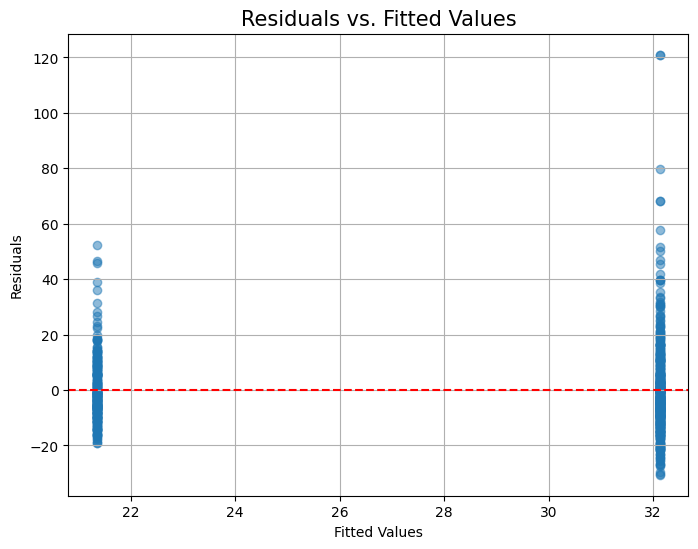

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_p_3, resid_3, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values',fontsize=15)
plt.xlabel('Fitted Values', fontsize=10)
plt.ylabel('Residuals',fontsize=10)
plt.grid(True)
plt.show()

> **Insight:**

The residual plot suggests heteroscedasticity, the variance not constant across all levels of the independent variables.